In [1]:
!pip install filterpy

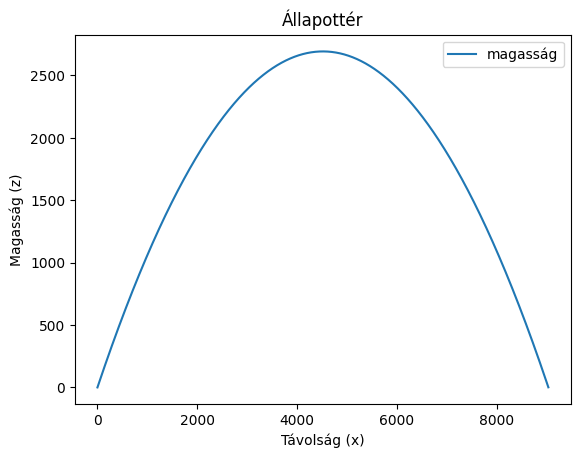

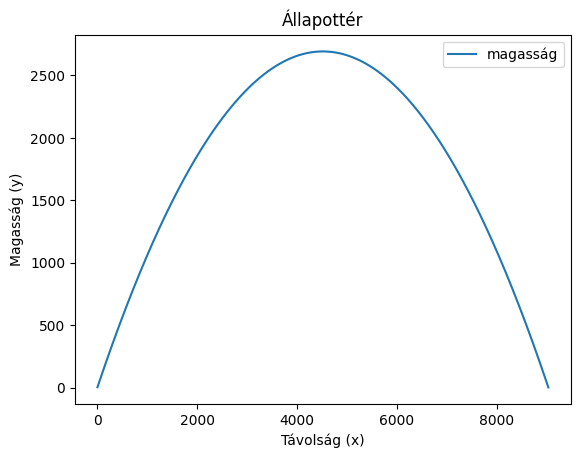

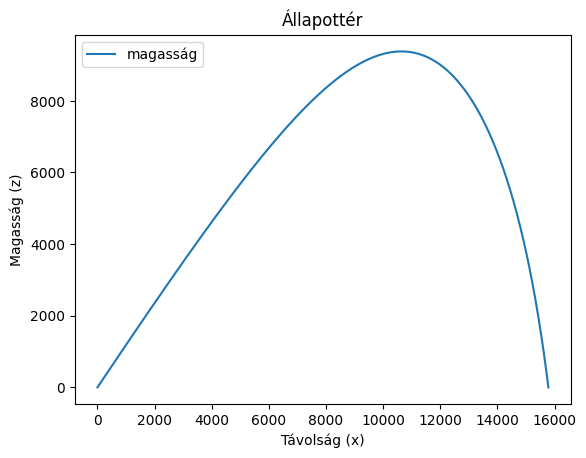

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[15]:


import numpy as np
from math import radians, cos, sin
from scipy.constants import g


# kezdő sebesség
v = 300
# theta (kilövési szög)
theta = radians(50)
 
# pozíciók az adott időpillanádban
x_t = []
z_t = []
# mérési időpillanatok
t = np.linspace(0, 100, num=10000).tolist()
 
# az adott időpillanathoz tartozó pozíció számítása
for k in t:
    x = ((v*k)*np.cos(theta)) 
    z = ((v*k)*np.sin(theta))-((0.5*g)*(k**2))
     
    # mentjük a számított pozíciót
    x_t.append(x)
    z_t.append(z)
 
# szűrjük azokat az időpillanatokat amelyek 0 magasság alatt vannak 
p = [i for i, j in enumerate(z_t) if j < 0] 
for i in sorted(p, reverse = True):
    del x_t[i]
    del z_t[i]
    del t[i]

import matplotlib.pyplot as plt
#bins_tavolsag=10
#bins= [x/bins_tavolsag for x in range(8*bins_tavolsag) ] [1:]

plt.plot( x_t, z_t, label="magasság")
plt.title("Állapottér")
plt.xlabel("Távolság (x)")
plt.ylabel("Magasság (z)")
plt.legend()
plt.show()


# In[7]:


a = np.array([[1, 2], [3, 4]])
list(a)


# In[8]:


a.tolist()


# In[82]:


import numpy as np
from math import radians, cos, sin
from scipy.constants import g


# kezdő sebbeség
v = 300
kezdoszog=radians(50)
# pozíciók az adott időpillanádban
x_t = []
y_t = []
 
# mérési időpillanatok
t = np.linspace(0, 100, num=10000) # Set time as 'continous' parameter.
t = t.tolist()
#print(t)
delta_t = t[1]-t[0]
 
# állandó mátrixok
A = np.array( [[1,0,delta_t,0], 
            [0,1,0,delta_t], 
            [0,0,1,0], 
            [0,0,0,1]] )
U = np.array([[g]])
B = np.array(  [ [0], [-0.5* (delta_t**2) ], [0],[-1*delta_t] ] )
 
# kezdő pont
X = np.array( [[0], [0], [ v * np.cos(kezdoszog) ], [ v * np.sin(kezdoszog) ]]   )
 
# az adott időpillanathoz tartozó pozíció számítása
for k in t:
    X = A.dot(X) + B.dot(U)
     
    # mentjük a számított pozíciót
    x_t.append( X[0][0] )
    y_t.append( X[1][0] )
 
# szűrjük azokat az időpillanatokat amelyek 0 magasság alatt vannak 
p = [i for i, j in enumerate(y_t) if j < 0]                         
for i in sorted(p, reverse = True):
    del x_t[i]
    del y_t[i]
    del t[i]
import matplotlib.pyplot as plt
#bins_tavolsag=10
#bins= [x/bins_tavolsag for x in range(8*bins_tavolsag) ] [1:]

plt.plot( x_t, y_t, label="magasság")
plt.title("Állapottér")
plt.xlabel("Távolság (x)")
plt.ylabel("Magasság (y)")
plt.legend()
plt.show()


# In[46]:


from math import sqrt, exp, radians, cos, sin, pi
 
# pozíciók az adott időpillanádban
x_t = []
z_t = []
 
# állandók
#   tömeg kg
m = 46
#   átmérő, m
d = .122
# alak ellenállása (Drag Coefficient)
Cd = .2
# légsürüsség kg/m^3
rho= 1.2
# gravitáció
g = 9.8
# kezdő sebbeség
v = 1500
# theta (kilövési szög)
theta = radians(50)
 
# Számított állandok
#   keresztmeszet területe
A = pi*(d**2)
# ellenállásra jellemző állandó 
D = rho*Cd*A/2

# menyi időnk van arra, hogy eldöntsük cselekedünk kell-e, másodperc
hatarido = 10
 
# mérési időpillanatok
t = np.linspace(0, 100, num=100000) # Set time as 'continous' parameter.
t = t.tolist()
delta_t = t[1]-t[0]
 
 
X = np.array( [ [0], [0], [ v * np.cos(theta) ], [ v * np.sin(theta) ]  ] ) #ez egy 4 elemű oszlopvektor
A = np.array( [ [1,0,delta_t,0], [0,1,0,delta_t], [0,0,1,0], [0,0,0,1]] ) #4*4-elemű mátrix
B = np.array( [ [ 0.5*delta_t**2, 0], [ 0, 0.5*delta_t**2], [delta_t, 0], [0, delta_t] ] ) #4*4-es mátrix
 
for k in t:
    U = np.array([
        [ -1.*(D/m) * X[2][0] * sqrt( X[2][0]**2 + X[3][0]**2 ) ], 
        [ -g-(D/m) * X[3][0] * sqrt( X[2][0]**2 + X[3][0]**2 ) ]] )#2*1-es oszlopvektor a gyorsulások képleteivel, X[3][0] az X 4.eleme
    #** második hatvány jelent
    X = A.dot(X) + B.dot(U) #Az X vektor tartalmazza az x, y pozíciókat X vektor nem változott
     
    # mentjük a szimulált poziciót
    x_t.append( X[0][0] )
    z_t.append( X[1][0] )
 
     
# szűrjük azokat az időpillanatokat amely 0 magasság alatt vannak
p = [i for i, j in enumerate(z_t) if j < 0]                          
for i in sorted(p, reverse = True):
    del x_t[i]
    del z_t[i]
    del t[i]
import matplotlib.pyplot as plt
#bins_tavolsag=10
#bins= [x/bins_tavolsag for x in range(8*bins_tavolsag) ] [1:]

plt.plot( x_t, z_t, label="magasság")
plt.title("Állapottér")
plt.xlabel("Távolság (x)")
plt.ylabel("Magasság (z)")
plt.legend()
plt.show()




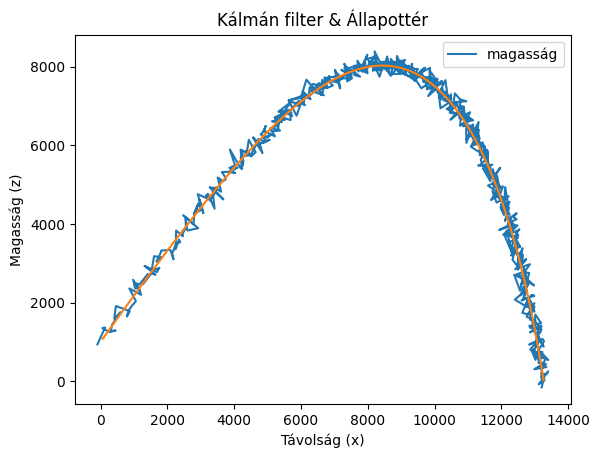

In [3]:
from math import radians, pi

# állandok
#   kiéget tömeg kg
m = 46
#   átmérő, m
d = .122
# alak ellenállása (Drag Coefficient)
Cd = .2
# légürüsség kg/m^3
rho= 1.2
# gravitáció
g = 9.8
# radar pontossága
accuracy = 125
# menyi időnk van arra, hogy eldöntsük cselekedünk kell-e, másodperc
hatarido = 10
# mérési időpillanatok közt eltelt idő
delta_t = 0.1
# prior
#   feltételezett kezdő sebesség
v_b = 1000
#   feltételezett kilövési szög
theta_b = radians(45)
#   valós sebesség a kiégés pillanatában
v = 1000
#   valós kilövési szög
theta = radians(50)


# Számított állandók
#   kertszemecet területe
A = pi*(d**2)
#   terminal vericity
D = rho*Cd*A/2
#   menyi mérési pont van a határidőn belül, lefelé kerekítve
deadline = int(hatarido/delta_t)

#   menyi mérési pont van a határidőn belül, lefelé kerekítve
deadline = int(hatarido/delta_t)
# radar pontossága
accuracy = 125

from math import sqrt
import numpy as np
 
def statespacemodel(X, dt):
    # pozíciók az adott időpillanatban
    x_t = []
    z_t = []
    v_x = []
    v_z = []    
     
    A = np.array( [ [1,0,delta_t,0], [0,1,0,delta_t], [0,0,1,0], [0,0,0,1]] )
    B = np.array( [ [ 0.5*delta_t**2, 0], [ 0, 0.5*delta_t**2], [delta_t, 0], [0, delta_t] ] ) #4*2-es mátrix
     
    while True:
        U = np.array([
            [ -1.*(D/m) * X[2][0] * sqrt( X[2][0]**2 + X[3][0]**2 ) ], 
            [ -g-(D/m) * X[3][0] * sqrt( X[2][0]**2 + X[3][0]**2 ) ]]
        )
        X = A.dot(X) + B.dot(U)
     
        # mentjük a szimulált poziciót
        if X[1][0] >= 0:
            x_t.append( X[0][0] )
            z_t.append( X[1][0] )
            v_x.append( X[2][0] )
            v_z.append( X[3][0] )
        else:
            break
     
    return(x_t,z_t,v_x,v_z)
 
# modellezés
x_t,z_t,v_x,v_z = statespacemodel( np.array( [ [0], [1000], [ v * np.cos(theta) ], [ v * np.sin(theta) ]  ] ), delta_t )
 
# zaj hozzáadása
# a normális eloszlás átlaga(accuracy), és a standard deviation (len(x_t)), ami egyébként a szórásnégyzet
zaj = np.random.normal(0,accuracy,len(x_t))
xt_z = np.add(x_t, zaj) #összeadás művelete
zaj = np.random.normal(0,accuracy,len(z_t))
zt_z = np.add(z_t, zaj)

import matplotlib.pyplot as plt
#bins_tavolsag=10
#bins= [x/bins_tavolsag for x in range(8*bins_tavolsag) ] [1:]

plt.plot(xt_z, zt_z, label="magasság")
plt.plot(x_t, z_t)

plt.title("Kálmán filter & Állapottér")
plt.xlabel("Távolság (x)")
plt.ylabel("Magasság (z)")
plt.legend()
plt.show()


In [4]:
# In[90]:


# a modellhez használt függvény
def fx(X, dt):
    # Újraformázzuk a mátrixot mivel a saját state space megvalósításunk ezt a formátumot használja
    X = X.reshape(4,1)
    
    # a state space modell amit ismerünk
    #  az A-t és a B-t ki lehetne mozgatni mivel állandók, 
    #  de itt hagyom, hogy együtt legyen látható az egész modell
    A = np.array( [ [1,0,delta_t,0], [0,1,0,delta_t], [0,0,1,0], [0,0,0,1]] )
    B = np.array( [ [ 0.5*delta_t**2, 0], [ 0, 0.5*delta_t**2], [delta_t, 0], [0, delta_t] ] ) #4*2-es mátrix
    U = np.array([
            [ -1.*(D/m) * X[2][0] * sqrt( X[2][0]**2 + X[3]**2 ) ], 
            [ -g-(D/m) * X[3][0] * sqrt( X[2][0]**2 + X[3]**2 ) ]]
                )
    X = A.dot(X) + B.dot(U)
    # vissza formázzuk az eredményt
    return X.flatten()
# mérési függvény, lényegében a mért értékeket az X mátrix megfelelő pontjára illeszti
def hx(x):
    return np.array([x[0], x[1]]) #első és második mátrixelem

# ezek a legáltalánosabb eredmények Normál zajhoz
from filterpy.kalman import MerweScaledSigmaPoints
sigmas = MerweScaledSigmaPoints(4, alpha=.1, beta=2., kappa=0)


In [5]:
# a Kálmán szűrő maga
from filterpy.kalman import UnscentedKalmanFilter
fs = []
zps = []

# szimulaciok száma
number_of_test = 200

for idx in range(number_of_test):
    print(f'Progress: {int(idx/number_of_test*100)}%', end='\r')
    # zaj hozzáadása
    zaj = np.random.normal(0,125,len(x_t))# a normális eloszlás átlaga(accuracy), és a standard deviation (len(x_t)), ami egyébként a szórásnégyzet
    xt_z = np.add(x_t, zaj) #összeadás művelete
    zaj = np.random.normal(0,125,len(z_t))
    zt_z = np.add(z_t, zaj)

    ukf = UnscentedKalmanFilter(dim_x=4, dim_z=2, dt=delta_t, hx=hx, fx=fx, points=sigmas)
    # Covariance Estimate Mátrix
    ukf.P *= 200
    # mennyire zajosak a mérések
    ukf.R *= np.array([accuracy,accuracy,sqrt(2*(accuracy**2)),sqrt(2*(accuracy**2))]).reshape(2,2)
    # menyit változik a rendszer az egyes időpillanatok között
    from filterpy.common import Q_discrete_white_noise
    ukf.Q = Q_discrete_white_noise(2, dt=delta_t, var=0.03, block_size=2)
    
    # a Kálmán szűrő által számított eredmény
    #   pálya adatok:
    zp = []
    #   földet érés 
    f = []

    # 1 ponttól indulunk mivel megfigyelőként nem tudható a 0.
    for i in range(1,len(xt_z)):
        # aktuális helyzet
        z = np.array([ xt_z[i], zt_z[i] ])
        ukf.predict()
        # prior 
        if i == 1:
            ukf.x = [ukf.x[0], ukf.x[1], 1000*cos(radians(45)), 1000*sin(radians(45))]
        ukf.update(z)
        zp.append(ukf.x)
    
        # földet élés előrejelezése csak az deadline előtt
        if i <= deadline:
            x_f, z_f, _ , _ = statespacemodel(ukf.x.reshape(4,1), delta_t) 
            if len(x_f) > 0:
                f.append(x_f[-1])
           
    fs.append(f)
    zps.append(zp)

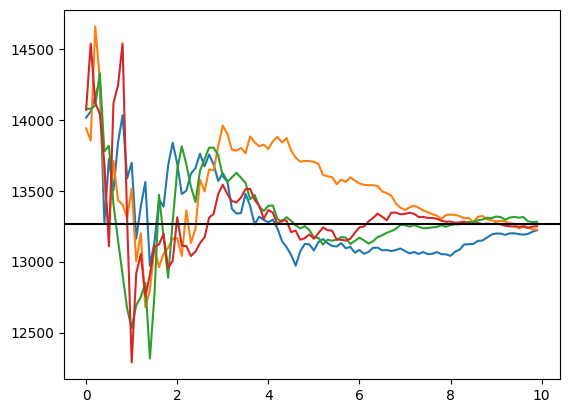

In [6]:
for test in range(4):
    plt.plot(
        [ x*delta_t for x in range(len(fs[test])) ],
        fs[test],
    )
plt.axhline(y=x_t[-1], color='black', linestyle='-')
plt.show()

C:\Users\Attila_Sajo\AppData\Local\Temp\ipykernel_12044\3233189403.py:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.array([ x[-1] for x in fs ]), bw=0.5)


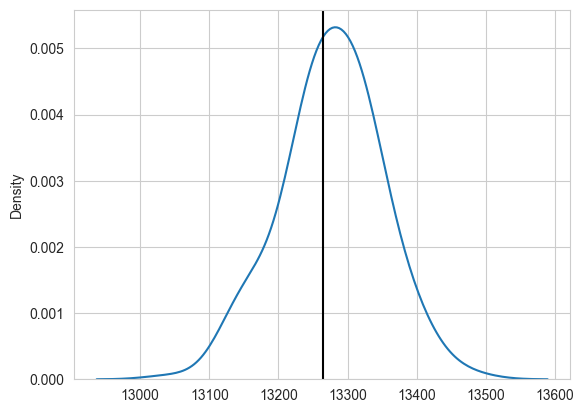

In [7]:
import seaborn as sns

sns.set_style('whitegrid')
sns.kdeplot(np.array([ x[-1] for x in fs ]), bw=0.5)
plt.axvline(x=x_t[-1], color='black', linestyle='-')
plt.show()